<a href="https://colab.research.google.com/github/cuongdaoo/Analyze-and-predict-customer-churn-rate-with-Power-BI-and-Random-Forest/blob/main/Churn_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn joblib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


#Import data

In [ ]:
df=pd.read_excel('Prediction_data.xlsx',sheet_name='vw_ChurnData')
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12728-AND,Female,28,Yes,Andhra Pradesh,2,13,NaN,Yes,Yes,...,Credit Card,80.300003,324.200012,0.0,0,154.960007,479.160004,Stayed,Others,Others
1,12736-ASS,Female,62,No,Assam,10,3,NaN,Yes,No,...,Bank Withdrawal,69.349998,69.349998,0.0,0,22.030001,91.379997,Churned,Attitude,Attitude of service provider
2,12739-HAR,Male,57,Yes,Haryana,1,31,NaN,Yes,Yes,...,Credit Card,88.650002,5321.250000,0.0,0,1194.380005,6515.629883,Stayed,Others,Others
3,12746-WES,Male,53,No,West Bengal,7,17,NaN,Yes,No,...,Credit Card,19.950001,59.250000,0.0,0,139.440002,198.690002,Stayed,Others,Others
4,12752-RAJ,Female,30,No,Rajasthan,4,17,NaN,Yes,No,...,Credit Card,20.500000,1424.900024,0.0,0,3291.879883,4716.779785,Stayed,Others,Others


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [ ]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


#Data preprocessing

In [ ]:
# Drop unnecessary columns
df=df.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,28,Yes,Andhra Pradesh,2,13,NaN,Yes,Yes,Yes,...,Month-to-Month,Yes,Credit Card,80.300003,324.200012,0.0,0,154.960007,479.160004,Stayed
1,Female,62,No,Assam,10,3,NaN,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,69.349998,69.349998,0.0,0,22.030001,91.379997,Churned
2,Male,57,Yes,Haryana,1,31,NaN,Yes,Yes,Yes,...,Two Year,No,Credit Card,88.650002,5321.250000,0.0,0,1194.380005,6515.629883,Stayed
3,Male,53,No,West Bengal,7,17,NaN,Yes,No,No,...,Month-to-Month,Yes,Credit Card,19.950001,59.250000,0.0,0,139.440002,198.690002,Stayed
4,Female,30,No,Rajasthan,4,17,NaN,Yes,No,No,...,Two Year,No,Credit Card,20.500000,1424.900024,0.0,0,3291.879883,4716.779785,Stayed


In [ ]:
# columns
df.columns.tolist()


['Gender',
 'Age',
 'Married',
 'State',
 'Number_of_Referrals',
 'Tenure_in_Months',
 'Value_Deal',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Internet_Type',
 'Online_Security',
 'Online_Backup',
 'Device_Protection_Plan',
 'Premium_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Streaming_Music',
 'Unlimited_Data',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Monthly_Charge',
 'Total_Charges',
 'Total_Refunds',
 'Total_Extra_Data_Charges',
 'Total_Long_Distance_Charges',
 'Total_Revenue',
 'Customer_Status']

In [ ]:
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Manually encode the target variable 'Customer_Status'
df['Customer_Status'] = df['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split df into features and target
X = df.drop('Customer_Status', axis=1) # target
y = df['Customer_Status']

# Split df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random forest model

n_estimators=100: Specifies that the model will use 100 decision trees. The larger the number of decision trees, the more accurate the model will usually be, but it will cost more computational resources.
random_state=42: Set a random seed for reproducible results. random_state controls how the datasets are randomly split or other random processes are performed during training.

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[814  45]
 [124 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       859
           1       0.83      0.64      0.72       343

    accuracy                           0.86      1202
   macro avg       0.85      0.79      0.81      1202
weighted avg       0.86      0.86      0.85      1202



814: Number of samples belonging to class 0 (negative) that were correctly predicted as 0.\
45: Number of samples belonging to class 0 but incorrectly predicted as 1 (false positives).\
124: Number of samples belonging to class 1 (positive) but incorrectly predicted as 0 (false negatives).\
219: Number of samples belonging to class 1 and correctly predicted as 1.\
Summary:\
**The model correctly predicted 814 class 0 samples and 219 class 1 samples.**\
**The model incorrectly predicted 45 class 0 samples and 124 class 1 samples.**


- **0 is "stayed"** (customers do not leave).

- **1 is "churned"** (customers have left).

### Model Evaluation

Based on your results, here is a detailed analysis in the context of churn prediction:

1. **Confusion Matrix**:

- **[814, 45]**:
- **814** customers were correctly predicted to stay.

- **45** customers were predicted to leave but actually stayed (false positives).

- **[124, 219]**:
- **124** customers were actually left but were predicted to stay (false negatives).

- **219** customers were correctly predicted to leave (churned).

2. **Precision and Recall for class "churned" (1)**:

- **Precision = 0.83** for class 1 means that of all the customers that the model predicted to churn, 83% actually churned. High precision is good in this context, as it shows that the model is relatively accurate in predicting a churning customer.

- **Recall = 0.64** for class 1, meaning that of all the customers that actually churned, only 64% were correctly predicted by the model. Low recall means that the model misses many churning customers, which may not be good if you want to maximize your ability to detect churning customers.

3. **F1-score for class "churned" (1)**:

- **F1-score = 0.72** for class 1, which is the weighted average of precision and recall. This F1-score shows that the model has a good balance between accuracy and churn detection, but there is still room for improvement in recall to reduce the dropout rate.

4. **Accuracy**:
- **Accuracy = 0.86** means that the model correctly predicted 86% of all customers, but in the churn problem, accuracy does not always reflect performance, especially when the ratio between the two classes is unbalanced.


This is the performance evaluation of the prediction model with **Confusion Matrix** and **Classification Report**. Specifically:

### 1. **Confusion Matrix**:

- **[814, 45]** and **[124, 219]**:
- **814**: Number of samples belonging to class 0 (negative) that are correctly predicted as 0.

- **45**: Number of samples belonging to class 0 but are incorrectly predicted as 1 (false positives).

- **124**: Number of samples belonging to class 1 (positive) but are incorrectly predicted as 0 (false negatives).
- **219**: Number of samples belonging to class 1 and correctly predicted is 1.

Summary:
- The model correctly predicted 814 class 0 samples and 219 class 1 samples.

- The model incorrectly predicted 45 class 0 samples and 124 class 1 samples.

### 2. **Classification Report**:
The report provides measurement indicators for each class:

- **Precision**: The ratio of correctly predicted samples to the total number of samples predicted by the model for that class.

- **Class 0**: Precision = 0.87, meaning that 87% of class 0 predictions are correct.

- **Class 1**: Precision = 0.83, meaning that 83% of class 1 predictions are correct.

- **Recall**: The ratio of correctly predicted samples to the total number of samples that actually belong to that class.
- **Class 0**: Recall = 0.95, the model correctly identifies 95% of the true class 0 samples.

- **Class 1**: Recall = 0.64, only 64% of the true class 1 samples are correctly identified by the model.

- **F1-score**: The average of precision and recall, used to balance both factors. A higher F1-score shows a balance between precision and recall.

- **Class 0**: F1-score = 0.91

- **Class 1**: F1-score = 0.72

- **Support**: The number of true samples of each class in the test set (`y_test`).

- Class 0 has 859 samples, and class 1 has 343 samples.

- **Overall Accuracy**: The rate of correct predictions on all samples. Here, accuracy = 0.86, meaning the model correctly predicts 86% of the samples in the test set.

- **Macro avg**: Average of the values ​​of precision, recall and F1-score across classes (arithmetic mean, unweighted).

- Macro avg precision = 0.85, recall = 0.79, F1-score = 0.81

- **Weighted avg**: Average of the values ​​of precision, recall and F1-score across classes with weighting (based on the number of samples of each class).
- Weighted avg precision = 0.86, recall = 0.86, F1-score = 0.85

### Comments:
The model has **accuracy of 86%** and performs well with class 0 (negative), but has more difficulty classifying class 1 (positive), due to the lower recall for this class (0.64).

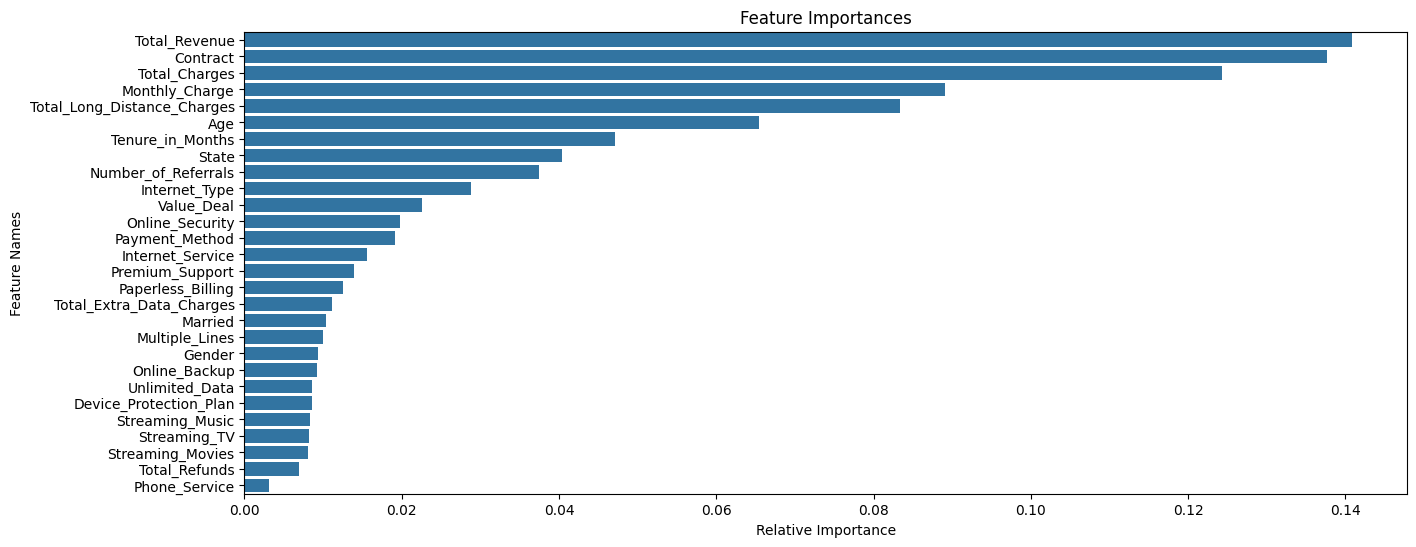

In [ ]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


# Use Model for Prediction on New Data

In [ ]:
valid_df=pd.read_excel('Prediction_data.xlsx',sheet_name='vw_JoinData')
valid_df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,16733-ODI,Female,76,Yes,Odisha,10,1,NaN,Yes,No,...,Credit Card,45.849998,45.849998,0.0,0,40.380001,86.230003,Joined,Others,Others
1,16764-WES,Male,40,No,West Bengal,15,13,Deal 5,Yes,No,...,Credit Card,20.799999,20.799999,0.0,0,48.139999,68.940002,Joined,Others,Others
2,17597-HAR,Female,33,Yes,Haryana,2,6,Deal 5,No,No,...,Bank Withdrawal,29.850000,29.850000,0.0,0,0.000000,29.850000,Joined,Others,Others
3,19539-PUN,Female,37,Yes,Punjab,14,8,Deal 5,Yes,No,...,Credit Card,45.400002,45.400002,0.0,0,49.330002,94.730003,Joined,Others,Others
4,19541-ODI,Female,37,Yes,Odisha,15,14,Deal 5,Yes,No,...,Credit Card,45.250000,74.199997,0.0,0,79.000000,153.199997,Joined,Others,Others


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [ ]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339844


##Preprocessing

In [ ]:
# Retain the original DataFrame to preserve unencoded columns
original_data = valid_df.copy()
# Retain the Customer_ID column
customer_ids = valid_df['Customer_ID']


In [ ]:
valid_df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [ ]:
# Drop columns that won't be used for prediction in the encoded DataFrame
valid_df = valid_df.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


In [ ]:
# Encode categorical variables using the saved label encoders
for column in valid_df.select_dtypes(include=['object']).columns:
    valid_df[column] = label_encoders[column].transform(valid_df[column])


In [ ]:
# Make predictions
new_predictions = rf_model.predict(valid_df)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [ ]:
original_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,16733-ODI,Female,76,Yes,Odisha,10,1,NaN,Yes,No,...,45.849998,45.849998,0.0,0,40.380001,86.230003,Joined,Others,Others,1
1,16764-WES,Male,40,No,West Bengal,15,13,Deal 5,Yes,No,...,20.799999,20.799999,0.0,0,48.139999,68.940002,Joined,Others,Others,1
2,17597-HAR,Female,33,Yes,Haryana,2,6,Deal 5,No,No,...,29.850000,29.850000,0.0,0,0.000000,29.850000,Joined,Others,Others,1
3,19539-PUN,Female,37,Yes,Punjab,14,8,Deal 5,Yes,No,...,45.400002,45.400002,0.0,0,49.330002,94.730003,Joined,Others,Others,1
4,19541-ODI,Female,37,Yes,Odisha,15,14,Deal 5,Yes,No,...,45.250000,74.199997,0.0,0,79.000000,153.199997,Joined,Others,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,88107-JAM,Female,58,No,Jammu & Kashmir,10,34,NaN,No,No,...,30.549999,30.549999,0.0,40,0.000000,70.550003,Joined,Others,Others,1
406,88111-MAH,Female,52,Yes,Maharashtra,15,32,NaN,Yes,No,...,83.400002,83.400002,0.0,0,43.060001,126.459999,Joined,Others,Others,1
408,95991-MAD,Female,37,Yes,Madhya Pradesh,0,32,NaN,Yes,No,...,50.250000,152.300003,0.0,0,84.570000,236.869995,Joined,Others,Others,1
409,98767-WES,Female,26,No,West Bengal,14,7,NaN,Yes,No,...,20.049999,20.049999,0.0,0,11.100000,31.150000,Joined,Others,Others,1


In [ ]:
original_data.to_excel('Predictions.xlsx', index=False)